In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    BaggingClassifier,
    ExtraTreesClassifier,
)
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, set_link_color_palette
from sklearn.feature_selection import SelectKBest, SelectFromModel, f_classif

/home/masa1771/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


# DataSet

In [3]:
df = pd.DataFrame(
    pd.read_csv(
        "../top_Gads_updated.dat",
        header=None,
        comment="#",
        sep="\s+",
        squeeze=True,
        names=["material", "adsorbate", "DF_lower", "DF_upper", "DF"],
    )
)

df = df[["material", "adsorbate", "DF"]]
aminoacid = df["adsorbate"].unique()

n = {}
for i in aminoacid:
    n[i] = list(df[df.adsorbate == i]["DF"])
X = pd.DataFrame(n)
aminoacids_label = list(df["adsorbate"].unique())
material_label = list(df["material"].unique())
X.index = material_label

In [9]:
main = ["ASP", "VAL", "PRO", "ETA", "PHO"]
rest = [i for i in aminoacids_label if i not in main]

In [10]:
def Mary_pred(i):
    Y = X[i]
    model = LinearRegression()
    model.fit(X[main], Y)
    ytest_pred = model.predict(X[main])
    return ytest_pred

In [11]:
X_new = X
for i in rest:
    X_new[i] = Mary_pred(i)

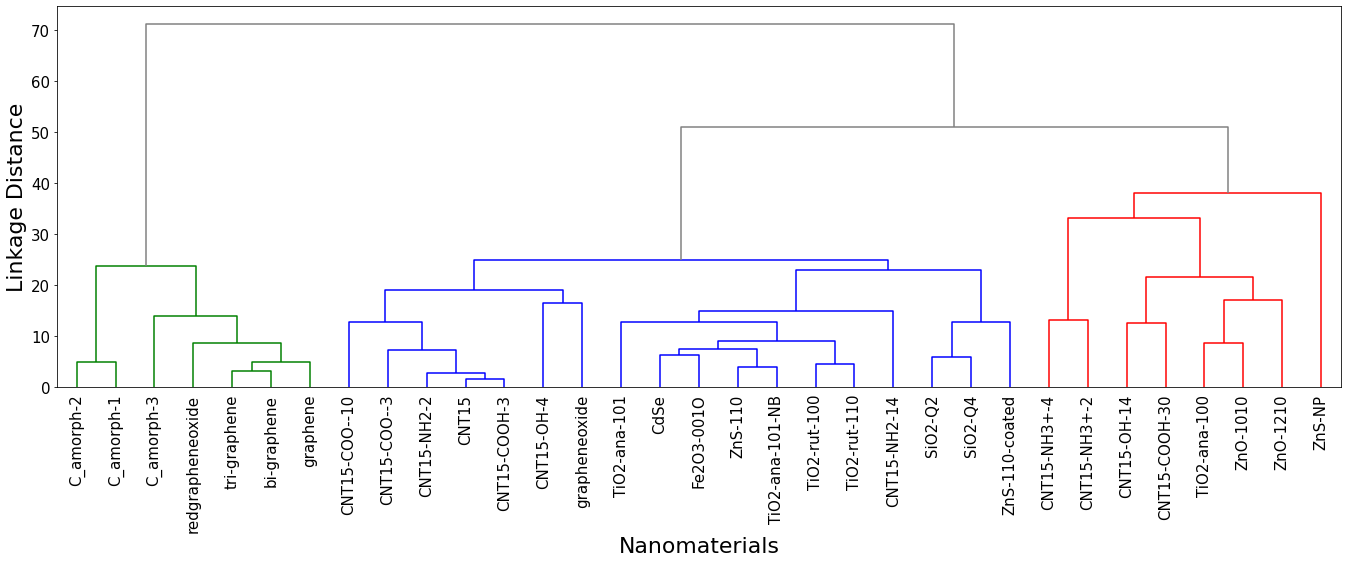

In [7]:
##plot
plt.figure(figsize=(23, 7))
dendrogram(
    linkage(X, method="weighted", optimal_ordering=True),
    labels=material_label,
    above_threshold_color="gray",
)
set_link_color_palette(["green", "blue", "red"])
plt.xlabel("Nanomaterials", fontsize=22)
plt.ylabel("Linkage Distance", fontsize=22)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=90)
plt.savefig("cluster-surfaces.pdf", format="pdf", dpi=1000, bbox_inches="tight")

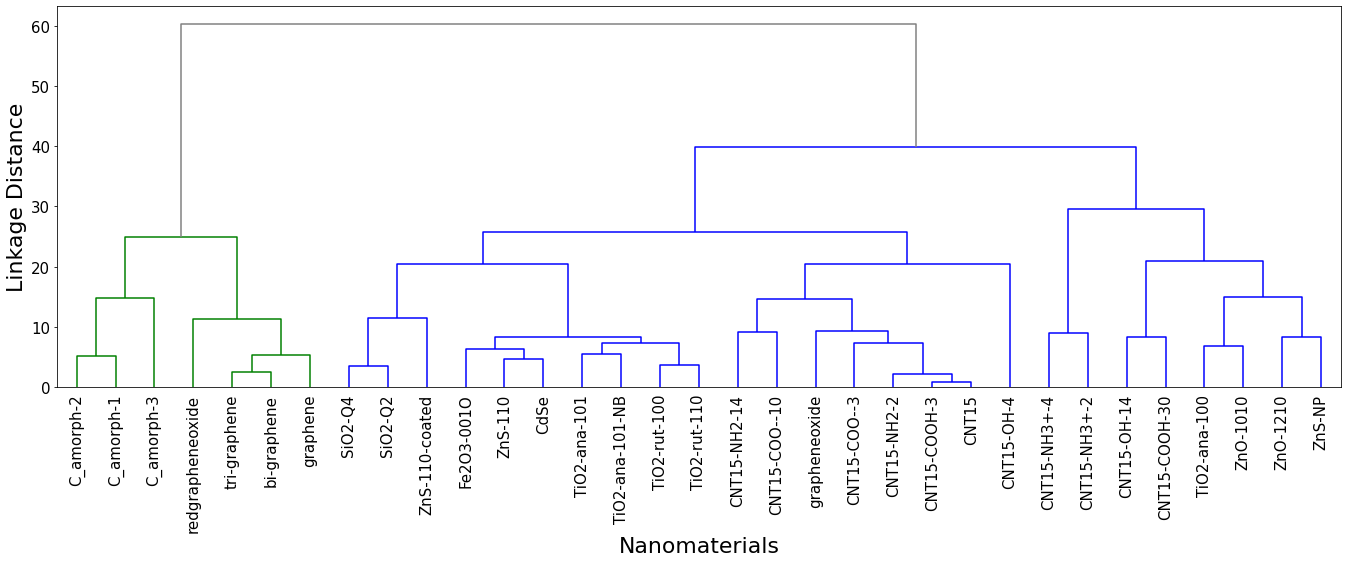

In [16]:
##plot
plt.figure(figsize=(23, 7))
dendrogram(
    linkage(X_new, method="weighted", optimal_ordering=True),
    labels=material_label,
    above_threshold_color="gray",
)
set_link_color_palette(["green", "blue", "red"])
plt.xlabel("Nanomaterials", fontsize=22)
plt.ylabel("Linkage Distance", fontsize=22)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=90)
plt.savefig(
    "cluster-surfaces-prediction.pdf", format="pdf", dpi=1000, bbox_inches="tight"
)